In [ ]:
! pip install fitter

     |████████████████████████████████| 47 kB 4.9 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=c6c8c638b03c6fba2563d1060cfcdd04cd75b07464ba9a286616fb169afdb907
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=e252f145620fc69f8f621831b749a8953ada584a3a6227f31ca501d05f5b188c
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from fitter import Fitter, get_common_distributions, get_distributions


In [ ]:
#the code allows an access from google drive to google collab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.


In [ ]:
# Load 
df = pd.read_csv("drive/MyDrive/data/listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


<b> Find how much the data and features</b>


In [ ]:
df.shape #find the feature and the data

(7907, 16)

<b> Find type of data for each attributes of features </b>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

<b> Find the statistic Description </b>

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [ ]:
#lets verify if there are null values in the data set 
df.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
#Removing Missing Value
df = df.dropna()

In [ ]:
df.shape

(5148, 16)

<b> Dropping the unnecessary columns </b>



In [ ]:
df.drop(['id','name','host_name','host_id','last_review',"neighbourhood_group", "neighbourhood"],axis=1,inplace=True)


<b> change the value of neighbour, and roomtype become a category</B>


In [ ]:
df["room_type"].unique()
df["room_type"].replace(['Private room', 'Entire home/apt','Shared room'],
                        [0, 1,2], inplace=True)
df["room_type"]

0       0
1       0
2       0
3       0
4       0
       ..
7715    1
7728    0
7752    0
7766    1
7767    0
Name: room_type, Length: 5148, dtype: int64

<b> Find the correlation between each attributes </b>

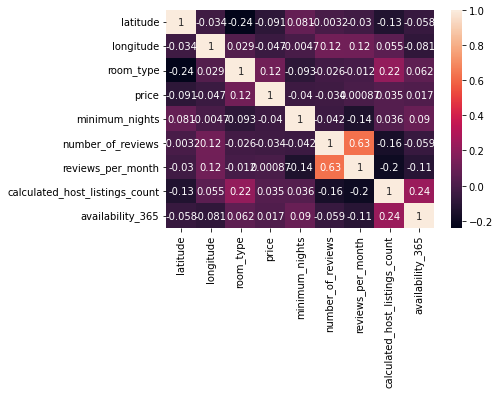

In [ ]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot = True)

<b> Checking for univariate outliers using boxplot </b>



latitude
longitude
room_type
price
minimum_nights
number_of_reviews
reviews_per_month
calculated_host_listings_count
availability_365


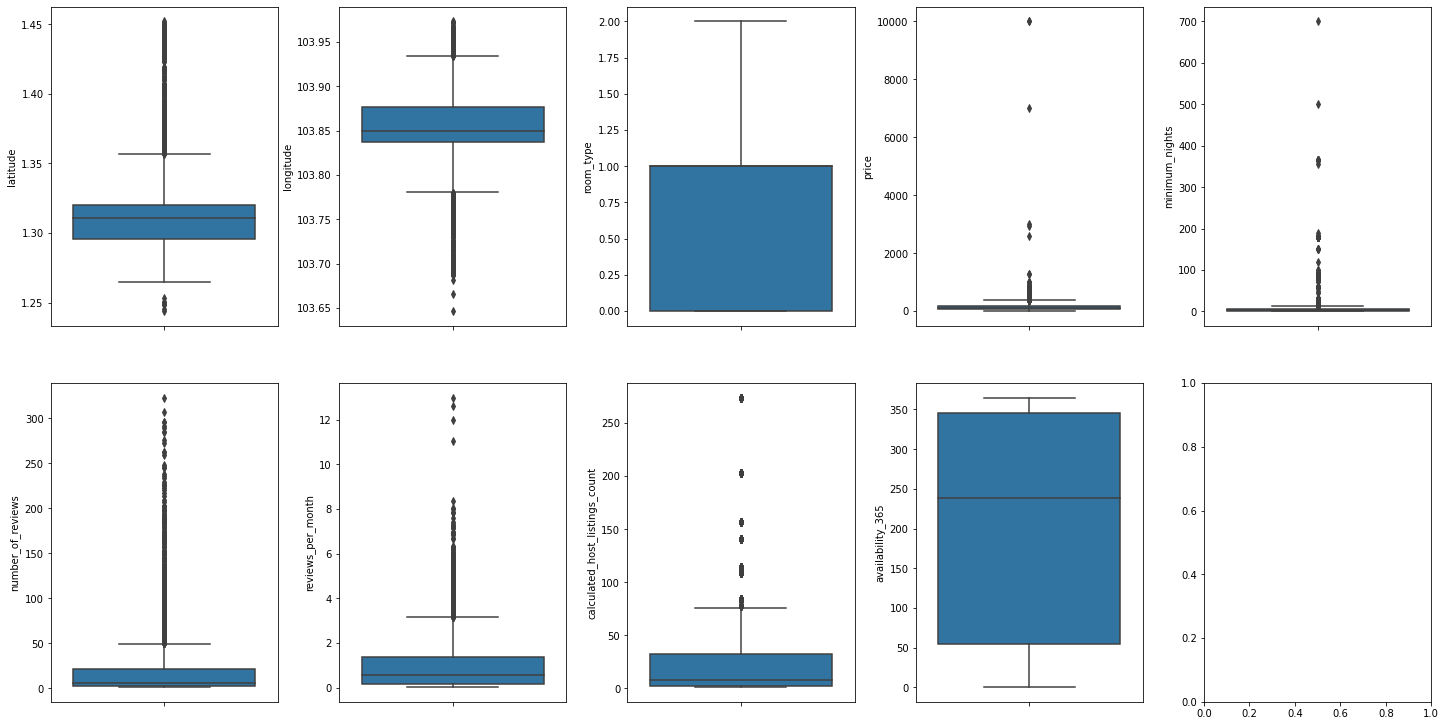

In [ ]:
#names=['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10)) #plot, sebanyak 7 kolom dan 2 baris
index = 0 
axs = axs.flatten()
for k,v in df.items():
    print(k)
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column latitude outliers = 7.48%
Column longitude outliers = 10.31%
Column room_type outliers = 0.00%
Column price outliers = 4.41%
Column minimum_nights outliers = 17.37%
Column number_of_reviews outliers = 11.17%
Column reviews_per_month outliers = 7.81%
Column calculated_host_listings_count outliers = 16.49%
Column availability_365 outliers = 0.00%


In [ ]:
#removing outlier based on the biggest percentage outlier 
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['minimum_nights'] >= Q1 - 1.5 * IQR) & (df['minimum_nights'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

# Visualisasi

Data visualization is important to give an illustration of our dataset

### We wanna find distribution in our data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

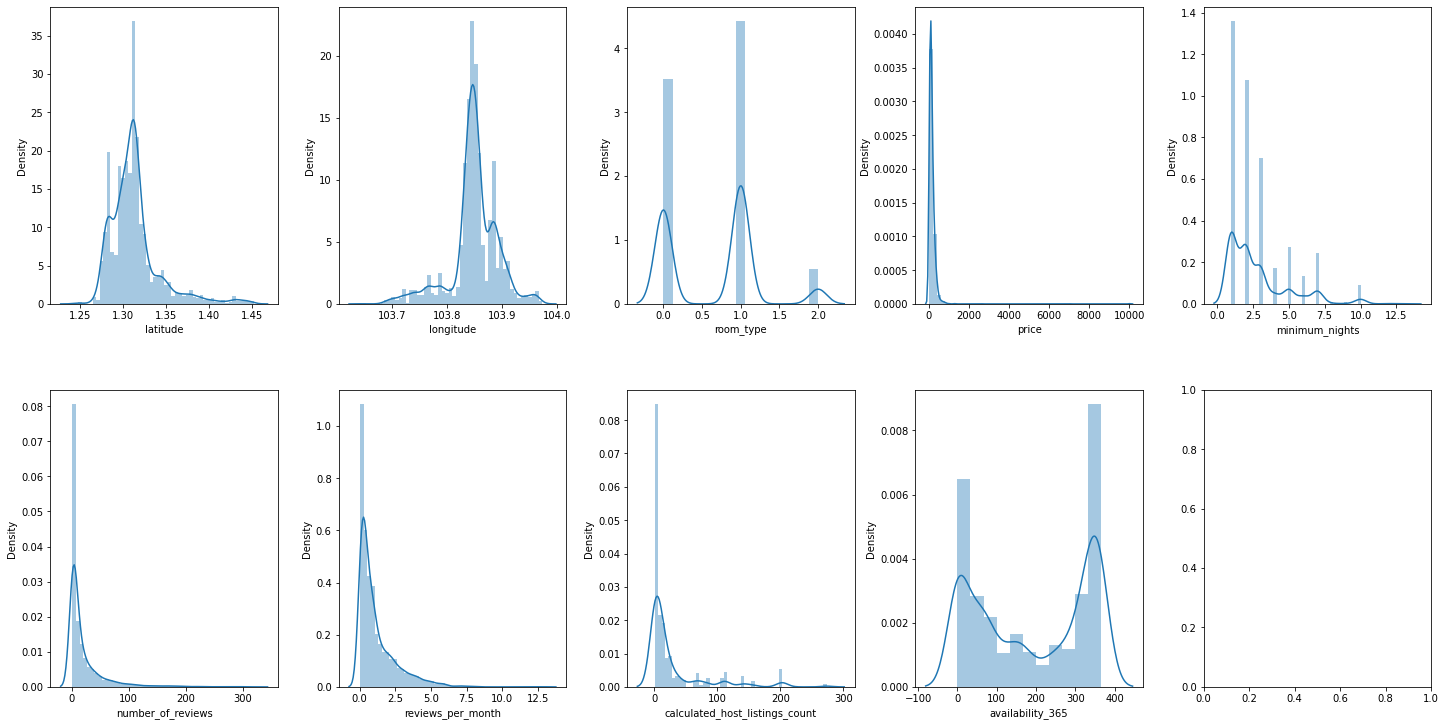

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

,sumsquare_error,aic,bic,kl_div
beta,1.872641e-07,12722.868087,-101408.997503,inf
lognorm,2.101483e-06,4149.085275,-91131.697280,inf
norm,1.240846e-05,44192.417112,-83586.075946,inf
burr,1.297180e-05,2281.054037,-83380.488676,inf
gamma,3.119135e-05,241499.714916,-79656.542018,inf


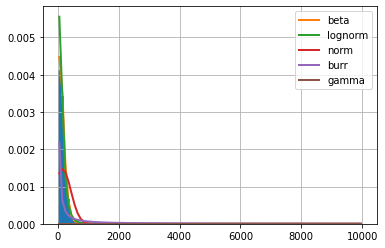

In [ ]:
medv = df["price"].values
f = Fitter(medv,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [ ]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 1.9286853526350158,
  'b': 7600704907947.056,
  'loc': -0.10607218248262296,
  'scale': 605278133546557.9}}

# Modeling

In [ ]:
from sklearn import linear_model


In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# Create linear regression objest
lin_reg=linear_model.LinearRegression()

# Train the model using trai and test data

lin_reg.fit(X_train,y_train)

# Presict values for X_test data

predicted = lin_reg.predict(X_test)

In [ ]:
# Regression coefficients

print('Coefficients are:\n',lin_reg.coef_)

# Intecept

print('\nIntercept : ',lin_reg.intercept_)

# variance score: 1 means perfect prediction

print('Variance score: ',lin_reg.score(X_test, y_test))

# Mean Squared Erroe
from sklearn.metrics import r2_score
print("Mean squared error: %.2f"% mean_squared_error(y_test, predicted))
print("R-squared:%.2f "% r2_score(y_test, predicted))
expected = y_test

Coefficients are:
 [-158.02888208 -144.60019282   57.60474462   -0.82113768 -127.75534445
   47.30629917   36.78916043    8.6219456 ]

Intercept :  279.585432570727
Variance score:  0.03871308334121282
Mean squared error: 14179.66
R-squared:0.04 


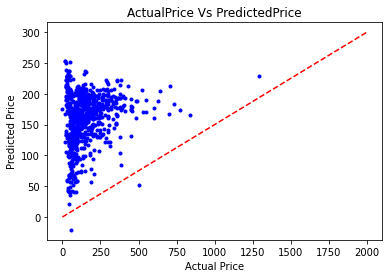

In [ ]:
#Plot a graph for expected and predicted values

plt.title('ActualPrice Vs PredictedPrice')
plt.scatter(expected,predicted,c='b',marker='.',s=36)
plt.plot([0, 2000], [0, 300], '--r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()